**<h1>CHATEARTHNET</h1>**

In [13]:
pip install rasterio


In [14]:
  pip install --upgrade keras

In [15]:
#import ee
import os
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import Any, Optional, Tuple
import glob
import keras
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.applications import ResNet50, VGG19, VGG16
from keras.applications.resnet50 import preprocess_input
from keras import optimizers
import shutil
from PIL import Image, ImageOps
import pandas as pd
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras import models, layers, optimizers, regularizers
from tensorflow.keras import Model
from tensorflow.data.experimental import cardinality
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
#import Google drive in Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:

dataset_path= '/content/gdrive/MyDrive/EuroSAT_RGB.zip'
!unzip "{dataset_path}" -d /content/eurosat_folder

Archive:  /content/gdrive/MyDrive/EuroSAT_RGB.zip
replace /content/eurosat_folder/EuroSAT_RGB/Forest/Forest_864.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [18]:
#specifying each class's location

data_AnnualCrop= '/content/eurosat_folder/EuroSAT_RGB/AnnualCrop'
data_Forest= '/content/eurosat_folder/EuroSAT_RGB/Forest'
data_HerbaceousVegetation= '/content/eurosat_folder/EuroSAT_RGB/HerbaceousVegetation'
data_Highway= '/content/eurosat_folder/EuroSAT_RGB/Highway'
data_Industrial= '/content/eurosat_folder/EuroSAT_RGB/Industrial'
data_Pasture= '/content/eurosat_folder/EuroSAT_RGB/Pasture'
data_PermanentCrop= '/content/eurosat_folder/EuroSAT_RGB/PermanentCrop'
data_Residential= '/content/eurosat_folder/EuroSAT_RGB/Residential'
data_River= '/content/eurosat_folder/EuroSAT_RGB/River'
data_SeaLake= '/content/eurosat_folder/EuroSAT_RGB/SeaLake'
new_directory= '/content/split/'

In [19]:
imgs_AnnualCrop= [file for file in os.listdir(data_AnnualCrop) if file.endswith('.jpg')]
imgs_Forest= [file for file in os.listdir(data_Forest) if file.endswith('.jpg')]
imgs_HerbaceousVegetation= [file for file in os.listdir(data_HerbaceousVegetation) if file.endswith('.jpg')]
imgs_Highway= [file for file in os.listdir(data_Highway) if file.endswith('.jpg')]
imgs_Industrial= [file for file in os.listdir(data_Industrial) if file.endswith('.jpg')]
imgs_Pasture= [file for file in os.listdir(data_Pasture) if file.endswith('.jpg')]
imgs_PermanentCrop= [file for file in os.listdir(data_PermanentCrop) if file.endswith('.jpg')]
imgs_Residential= [file for file in os.listdir(data_Residential) if file.endswith('.jpg')]
imgs_River= [file for file in os.listdir(data_River) if file.endswith('.jpg')]
imgs_SeaLake= [file for file in os.listdir(data_SeaLake) if file.endswith('.jpg')]

In [20]:
os.mkdir(new_directory)

In [21]:
# setting up train folders
train_folder= os.path.join(new_directory, 'train')
train_AnnualCrop= os.path.join(train_folder, 'AnnualCrop')
train_Forest= os.path.join(train_folder, 'Forest')
train_HerbaceousVegetation= os.path.join(train_folder, 'HerbaceousVegetation')
train_Highway= os.path.join(train_folder, 'Highway')
train_Industrial= os.path.join(train_folder, 'Industrial')
train_Pasture= os.path.join(train_folder, 'Pasture')
train_PermanentCrop= os.path.join(train_folder, 'PermanentCrop')
train_Residential= os.path.join(train_folder, 'Residential')
train_River= os.path.join(train_folder, 'River')
train_SeaLake= os.path.join(train_folder, 'SeaLake')
# setting up test folders
test_folder= os.path.join(new_directory, 'test')
test_AnnualCrop= os.path.join(test_folder, 'AnnualCrop')
test_Forest= os.path.join(test_folder, 'Forest')
test_HerbaceousVegetation= os.path.join(test_folder, 'HerbaceousVegetation')
test_Highway= os.path.join(test_folder, 'Highway')
test_Industrial= os.path.join(test_folder, 'Industrial')
test_Pasture= os.path.join(test_folder, 'Pasture')
test_PermanentCrop= os.path.join(test_folder, 'PermanentCrop')
test_Residential= os.path.join(test_folder, 'Residential')
test_River= os.path.join(test_folder, 'River')
test_SeaLake= os.path.join(test_folder, 'SeaLake')

In [22]:
# train directories
os.mkdir(train_folder)
os.mkdir(train_AnnualCrop)
os.mkdir(train_Forest)
os.mkdir(train_HerbaceousVegetation)
os.mkdir(train_Highway)
os.mkdir(train_Industrial)
os.mkdir(train_Pasture)
os.mkdir(train_PermanentCrop)
os.mkdir(train_Residential)
os.mkdir(train_River)
os.mkdir(train_SeaLake)
# test directories
os.mkdir(test_folder)
os.mkdir(test_AnnualCrop)
os.mkdir(test_Forest)
os.mkdir(test_HerbaceousVegetation)
os.mkdir(test_Highway)
os.mkdir(test_Industrial)
os.mkdir(test_Pasture)
os.mkdir(test_PermanentCrop)
os.mkdir(test_Residential)
os.mkdir(test_River)
os.mkdir(test_SeaLake)

In [23]:
# split 80% of images into folders- Train
images= imgs_AnnualCrop[:2400]
for img in images:
    origin= os.path.join(data_AnnualCrop, img)
    destination= os.path.join(train_AnnualCrop, img)
    shutil.copyfile(origin, destination)

images= imgs_Forest[:2400]
for img in images:
    origin= os.path.join(data_Forest, img)
    destination= os.path.join(train_Forest, img)
    shutil.copyfile(origin, destination)

images= imgs_HerbaceousVegetation[:2400]
for img in images:
    origin= os.path.join(data_HerbaceousVegetation, img)
    destination= os.path.join(train_HerbaceousVegetation, img)
    shutil.copyfile(origin, destination)

images= imgs_Highway[:2000]
for img in images:
    origin= os.path.join(data_Highway, img)
    destination= os.path.join(train_Highway, img)
    shutil.copyfile(origin, destination)

images= imgs_Industrial[:2000]
for img in images:
    origin= os.path.join(data_Industrial, img)
    destination= os.path.join(train_Industrial, img)
    shutil.copyfile(origin, destination)

images= imgs_Pasture[:1600]
for img in images:
    origin= os.path.join(data_Pasture, img)
    destination= os.path.join(train_Pasture, img)
    shutil.copyfile(origin, destination)

images= imgs_PermanentCrop[:2000]
for img in images:
    origin= os.path.join(data_PermanentCrop, img)
    destination= os.path.join(train_PermanentCrop, img)
    shutil.copyfile(origin, destination)

images= imgs_Residential[:2400]
for img in images:
    origin= os.path.join(data_Residential, img)
    destination= os.path.join(train_Residential, img)
    shutil.copyfile(origin, destination)

images= imgs_River[:2000]
for img in images:
    origin= os.path.join(data_River, img)
    destination= os.path.join(train_River, img)
    shutil.copyfile(origin, destination)

images= imgs_SeaLake[:2400]
for img in images:
    origin= os.path.join(data_SeaLake, img)
    destination= os.path.join(train_SeaLake, img)
    shutil.copyfile(origin, destination)

In [24]:
# split other 20% of images into folders- Test
images= imgs_AnnualCrop[2400:] #600
for img in images:
    origin= os.path.join(data_AnnualCrop, img)
    destination= os.path.join(test_AnnualCrop, img)
    shutil.copyfile(origin, destination)

images= imgs_Forest[2400:] #600
for img in images:
    origin= os.path.join(data_Forest, img)
    destination= os.path.join(test_Forest, img)
    shutil.copyfile(origin, destination)

images= imgs_HerbaceousVegetation[2400:] #600
for img in images:
    origin= os.path.join(data_HerbaceousVegetation, img)
    destination= os.path.join(test_HerbaceousVegetation, img)
    shutil.copyfile(origin, destination)

images= imgs_Highway[2000:] #500
for img in images:
    origin= os.path.join(data_Highway, img)
    destination= os.path.join(test_Highway, img)
    shutil.copyfile(origin, destination)

images= imgs_Industrial[2000:] #500
for img in images:
    origin= os.path.join(data_Industrial, img)
    destination= os.path.join(test_Industrial, img)
    shutil.copyfile(origin, destination)

images= imgs_Pasture[1600:] #400
for img in images:
    origin= os.path.join(data_Pasture, img)
    destination= os.path.join(test_Pasture, img)
    shutil.copyfile(origin, destination)

images= imgs_PermanentCrop[2000:] #500
for img in images:
    origin= os.path.join(data_PermanentCrop, img)
    destination= os.path.join(test_PermanentCrop, img)
    shutil.copyfile(origin, destination)

images= imgs_Residential[2400:] #600
for img in images:
    origin= os.path.join(data_Residential, img)
    destination= os.path.join(test_Residential, img)
    shutil.copyfile(origin, destination)

images= imgs_River[2000:] #500
for img in images:
    origin= os.path.join(data_River, img)
    destination= os.path.join(test_River, img)
    shutil.copyfile(origin, destination)

images= imgs_SeaLake[2400:] #600
for img in images:
    origin= os.path.join(data_SeaLake, img)
    destination= os.path.join(test_SeaLake, img)
    shutil.copyfile(origin, destination)

In [25]:
train_folder= '/content/split/train'
test_folder= '/content/split/test'
# normalizing images
train_gen= ImageDataGenerator(rescale= 1./255, validation_split= 0.125)
test_gen= ImageDataGenerator(rescale= 1./255)

# 70% train, 10% val, 20% test
train_generator= train_gen.flow_from_directory(train_folder, class_mode= 'categorical', subset= 'training', batch_size= 128, shuffle= True, seed= 42)
val_generator= train_gen.flow_from_directory(train_folder, class_mode= 'categorical', subset= 'validation', batch_size= 128, shuffle= True, seed= 42)
test_generator= test_gen.flow_from_directory(test_folder, class_mode= 'categorical', batch_size= 128, shuffle= True, seed= 42)

Found 18900 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [26]:
# features/labels data
train_features, train_labels= next(train_generator)
test_features, test_labels= next(test_generator)
val_features, val_labels= next(val_generator)


In [ ]:
train_classes= train_generator.classes
val_classes= val_generator.classes
test_classes= test_generator.classes
# distribution by class across each set
train_class, train_count= np.unique(train_classes, return_counts= True)
val_class, val_count= np.unique(val_classes, return_counts= True)
test_class, test_count= np.unique(test_classes, return_counts= True)
print('Train: {}'.format(list(zip(train_class, train_count))))
print('Validation: {}'.format(list(zip(val_class, val_count))))
print('Test: {}'.format(list(zip(test_class, test_count))))
print('--------------------------------------------------')
# class names
train_class_names= train_generator.class_indices
print('Train:', train_class_names)
val_class_names= val_generator.class_indices
print('Validation:', val_class_names)
test_class_names= test_generator.class_indices
print('Train:', test_class_names)
print('--------------------------------------------------')
# view shape of data
print("Train")
print(np.shape(train_features))
print(np.shape(train_labels))
print("Validation")
print(np.shape(val_features))
print(np.shape(val_labels))
print("Test")
print(np.shape(test_features))
print(np.shape(test_labels))

Train: [(0, 2100), (1, 2100), (2, 2100), (3, 1750), (4, 1750), (5, 1400), (6, 1750), (7, 2100), (8, 1750), (9, 2100)]
Validation: [(0, 300), (1, 300), (2, 300), (3, 250), (4, 250), (5, 200), (6, 250), (7, 300), (8, 250), (9, 300)]
Test: [(0, 600), (1, 600), (2, 600), (3, 500), (4, 500), (5, 400), (6, 500), (7, 600), (8, 500), (9, 600)]
--------------------------------------------------
Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Validation: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
Train: {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}
--------------------------------------------------
Train
(128, 256, 256, 3)
(128, 10

**<h3>Transfer Learning: VGG16 Augmentation and Fine Tuning</h3>**

In [27]:
train_folder= '/content/split/train'
test_folder= '/content/split/test'


# by augmeting, we artificially increases the diversity of our training dataset
# Normalize images
augmented_training_values = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.3,
                                     rotation_range=50,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest',
                                     preprocessing_function = tf.keras.applications.vgg16.preprocess_input, #scaling the input to match the model's expected input
                                     validation_split = 0.125)

augmented_validation_values = ImageDataGenerator(rescale=1./255,
                               preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                               validation_split = 0.125)

augmented_testing_values = ImageDataGenerator(rescale=1./255,
                              preprocessing_function = tf.keras.applications.vgg16.preprocess_input)




# Splitting data into 70% training, 10% validation set, 20% testing

training_split = augmented_training_values.flow_from_directory(train_folder,
                                                class_mode = 'categorical',
                                                subset ='training',
                                                batch_size=128,
                                                shuffle=True,
                                                seed=42)

validation_split= augmented_validation_values.flow_from_directory(train_folder,
                                             class_mode= 'categorical',
                                             subset = "validation",
                                             batch_size=128,
                                             shuffle=True,
                                             seed=42)

testing_split= augmented_testing_values.flow_from_directory(test_folder,
                                              class_mode= 'categorical',
                                              batch_size=128,
                                              shuffle=False,
                                              seed=42)



Found 18900 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [7]:
#Reshapeing oyr input to match the expected input of VGG MODEL
vgg16_input = VGG16(weights='imagenet',  #use the pretained weights from the imagenet model
              include_top=False, #remove the top classification layer as we will add our own custom layers
              input_shape=(256, 256, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
vgg16_input.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Instantiate a Sequential model
aug_vgg16_model = Sequential()

#Input Layer
aug_vgg16_model.add(vgg16_input)

aug_vgg16_model.add(layers.Flatten())

#Add Dense Layer
aug_vgg16_model.add(layers.Dense(512, activation='relu'))
aug_vgg16_model.add(layers.Dropout(0.3))

#Add Dense Layer
aug_vgg16_model.add(layers.Dense(64, activation='relu'))
aug_vgg16_model.add(layers.Dropout(0.3))

#Output Layer
aug_vgg16_model.add(layers.Dense(10, activation='softmax'))

In [10]:

print("Number of layers in the VGG16 base model: ", len(vgg16_input.layers))


Number of layers in the VGG16 base model:  19


In [ ]:
# Fine-tune from layer 15 onwards
fine_tune_at = 15

# Freeze all the layers before the `fine_tune_at` layer
for layer in vgg16_input.layers[:fine_tune_at]:
  layer.trainable = False


In [ ]:
#Compile the model- adam optimizer, categorical_crossentropy loss, and set our metric to accuracy
aug_vgg16_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
# Fit the model
aug_vgg16_model_history = aug_vgg16_model.fit(training_split,
                                  epochs= 50,
                                  validation_data = validation_split,
                                  batch_size=128,
                                  verbose = 1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 448s 3s/step - accuracy: 0.1743 - loss: 2.3168 - val_accuracy: 0.4026 - val_loss: 1.5534
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.3822 - loss: 1.5901 - val_accuracy: 0.5759 - val_loss: 1.1878
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.5524 - loss: 1.2234 - val_accuracy: 0.6704 - val_loss: 0.9513
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.6514 - loss: 0.9794 - val_accuracy: 0.6852 - val_loss: 0.8874
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.7112 - loss: 0.8325 - val_accuracy: 0.7433 - val_loss: 0.6897
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.7456 - loss: 0.7258 - val_accuracy: 0.7930 - val_loss: 0.5801
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.7787 - loss: 0.6451 - val_accuracy: 0.7974 - val_loss: 0.5760
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.7971 - loss: 0.6118 - val_accuracy: 0.831

Load the model

In [28]:
import keras
# Now, load the model
vmodel = keras.models.load_model('/content/gdrive/MyDrive/VGG16Model (1).h5') #replace the model's name


In [ ]:
# Evaluate the model on the new dataset
test_loss, test_accuracy = vmodel.evaluate(testing_split, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9315 - loss: 0.2089


In [ ]:

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Training confusion matrix

confusion_matrix=confusion_matrix(train_labels,classes_x )


NameError: name 'classes_x' is not defined

In [ ]:
import numpy as np
from PIL import Image
import tensorflow as tf

def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256,256))  # Resize to the expected input shape
    img = np.array(img) / 255.0  # Normalize pixel values to [0,1]
    # Add a batch dimension (required by Keras)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    return img

# Example usage:
image_path = '/content/highway.jpeg'  # Replace with your RGB image path
input_image = preprocess_image(image_path)

# Now input_image is in the correct shape and format to be fed into the model:
# (batch_size, height, width, channels) = (1, 256, 256, 3)
prediction=vmodel.predict(input_image)

prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


array([[4.3078387e-26, 4.1012306e-35, 3.0096300e-14, 8.8943911e-01,
        9.4852805e-07, 2.9093813e-37, 2.2609138e-16, 1.1055992e-01,
        2.3749325e-09, 1.7909996e-41]], dtype=float32)

In [ ]:
# Find the index of the largest value in the array
predicted_class = np.argmax(prediction)

# Find the largest value itself
max_value = np.max(prediction)

print(f"The predicted class is: {predicted_class}")
print(f"The largest probability is: {max_value}")


# Dictionary of class labels
class_labels = {'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3,
                'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7,
                'River': 8, 'SeaLake': 9}

# Invert the dictionary to map index to class labels
index_to_class = {v: k for k, v in class_labels.items()}

# Iterate over the predictions and print the class along with the probability
for idx, probability in enumerate(prediction[0]):
    class_name = index_to_class[idx]
    print(f"Class: {class_name}, Probability: {probability:.6f}")

The predicted class is: 3
The largest probability is: 0.8894391059875488
Class: AnnualCrop, Probability: 0.000000
Class: Forest, Probability: 0.000000
Class: HerbaceousVegetation, Probability: 0.000000
Class: Highway, Probability: 0.889439
Class: Industrial, Probability: 0.000001
Class: Pasture, Probability: 0.000000
Class: PermanentCrop, Probability: 0.000000
Class: Residential, Probability: 0.110560
Class: River, Probability: 0.000000
Class: SeaLake, Probability: 0.000000


43/43 ━━━━━━━━━━━━━━━━━━━━ 27s 619ms/step


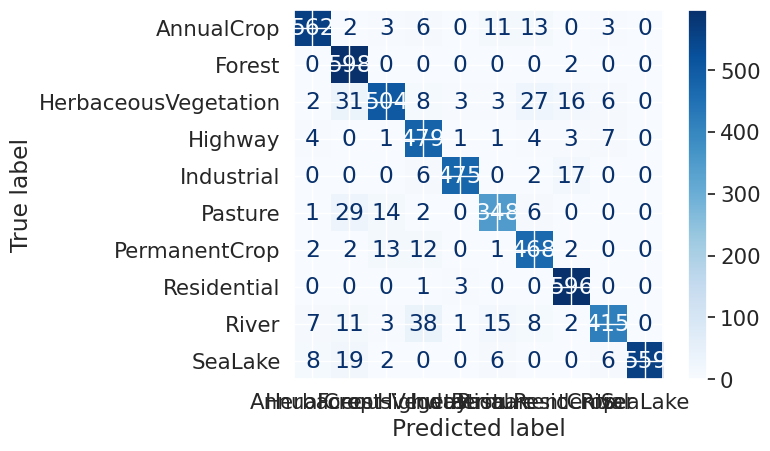

In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator


# # Get predictions for the entire training data
# training_split.reset()  # Ensure the generator is at the start
# train_predictions = vmodel.predict(training_split, steps=len(training_split))
# train_predictions_indices = np.argmax(train_predictions, axis=1)

# # Extract true labels from the generator
# train_labels_indices = training_split.classes

# # Compute confusion matrix
# cm_train = confusion_matrix(train_labels_indices, train_predictions_indices)

# # Define class names (make sure they match the class names used in your model)
# class_names = list(training_split.class_indices.keys())

# # Create a DataFrame for better visualization
# df_cm = pd.DataFrame(cm_train, index=class_names, columns=class_names)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.4)  # For label size
# sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Training Data Confusion Matrix', fontsize=15, weight='bold')
# plt.xlabel('Predicted Class', fontsize=15, labelpad=30)
# plt.ylabel('True Class', fontsize=15, labelpad=30)
# plt.xticks(rotation=45)  # Rotate x labels if needed
# plt.yticks(rotation=0)   # Rotate y labels if needed
# plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions for the test set
test_predictions = vmodel.predict(testing_split)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(testing_split.classes, test_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=testing_split.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()



In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt


In [ ]:
file_path = '/content/gdrive/MyDrive/Islamabad_Sentinel2-0000000000-0000004608.tif'
with rasterio.open(file_path) as src:
    print(src.profile)  # Prints metadata
    image_data = src.read([1, 2, 3])  # Read the first three bands (assuming they are RGB)



# Assuming you have read the data using rasterio
min_val = np.min(image_data)
max_val = np.max(image_data)
print(f"Min value: {min_val}, Max value: {max_val}")



{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 1833, 'height': 3566, 'count': 26, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 73.22563139583232,
       0.0, -8.983152841195215e-05, 33.810521169105314), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}
Min value: 0.0, Max value: 9808.0


In [ ]:

plt.figure(figsize=(10, 10))
show(image_data, transform=src.transform)
plt.title("RGB Image from GeoTIFF")
plt.axis('off')  # Hide axes for better visualization
plt.show()


In [ ]:
# Assuming that Bands 4, 3, 2 correspond to Red, Green, Blue
with rasterio.open(file_path) as src:
    red_band = src.read(4)  # Band 4
    green_band = src.read(3)  # Band 3
    blue_band = src.read(2)  # Band 2


In [ ]:
min_val = 0
max_val = 3000

# Clip and normalize
red_band_normalized = np.clip(red_band, min_val, max_val) / max_val
green_band_normalized = np.clip(green_band, min_val, max_val) / max_val
blue_band_normalized = np.clip(blue_band, min_val, max_val) / max_val


gamma = 1.4

# Apply gamma correction
red_band_corrected = np.power(red_band_normalized, 1/gamma)
green_band_corrected = np.power(green_band_normalized, 1/gamma)
blue_band_corrected = np.power(blue_band_normalized, 1/gamma)

# Stack the bands into an RGB image
image_rgb = np.dstack((red_band_corrected, green_band_corrected, blue_band_corrected))

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:


# install pyrsgis library
!pip install pyrsgis